<a href="https://colab.research.google.com/github/adildhkh/my-website/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers, datasets

# Load the dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Find the number of classes
num_classes = len(set(y_train))


In [3]:
# Build the model using Functional API
inputs = layers.Input(shape=(28, 28, 1))

# First convolutional layer
x = layers.Conv2D(32, (3, 3), strides=2, activation='relu')(inputs)

# Second convolutional layer
x = layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)

# Third convolutional layer
x = layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)

# Flatten the feature maps
x = layers.Flatten()(x)

# Fully connected dense layer
x = layers.Dense(128, activation='relu')(x)

# Dropout layer
x = layers.Dropout(0.5)(x)

# Output layer with softmax
outputs = layers.Dense(num_classes, activation='softmax')(x)

In [4]:
# Create the model
model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7078 - loss: 0.8172 - val_accuracy: 0.8452 - val_loss: 0.4226
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8515 - loss: 0.4073 - val_accuracy: 0.8698 - val_loss: 0.3512
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8733 - loss: 0.3420 - val_accuracy: 0.8802 - val_loss: 0.3304
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8887 - loss: 0.3046 - val_accuracy: 0.8858 - val_loss: 0.3176
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8980 - loss: 0.2776 - val_accuracy: 0.8914 - val_loss: 0.2981
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9071 - loss: 0.2511 - val_accuracy: 0.8949 - val_loss: 0.2868
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9150 - loss: 0.2317 - val_accuracy: 0.8981 - val_loss: 0.2858
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9192 - loss: 0.213

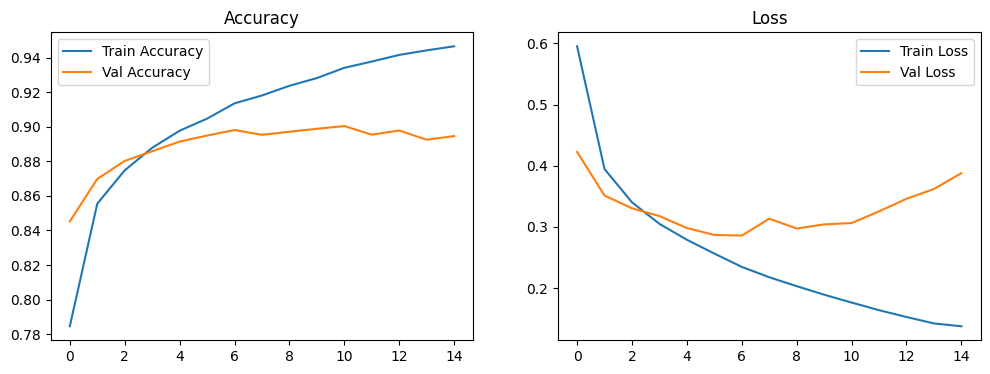

In [6]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


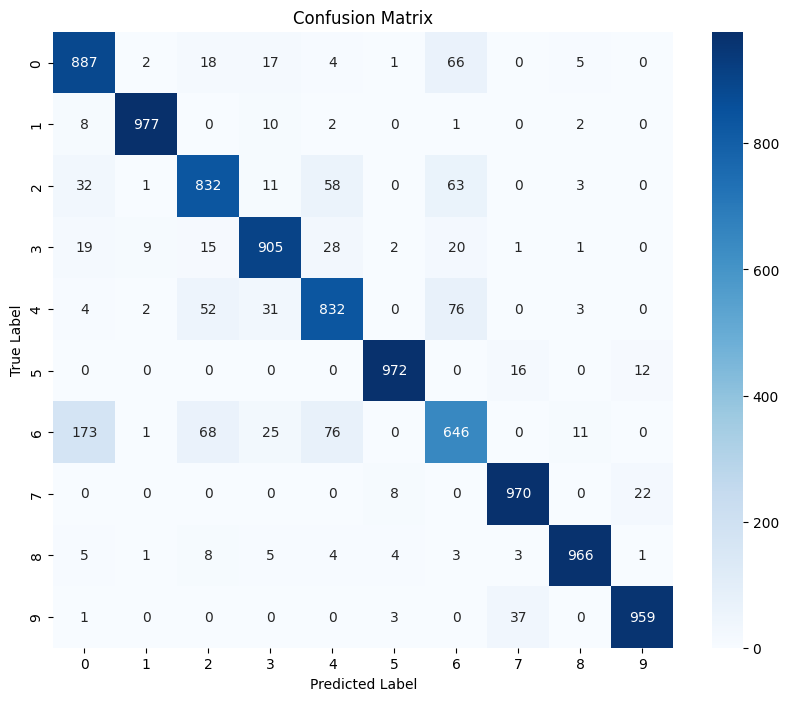

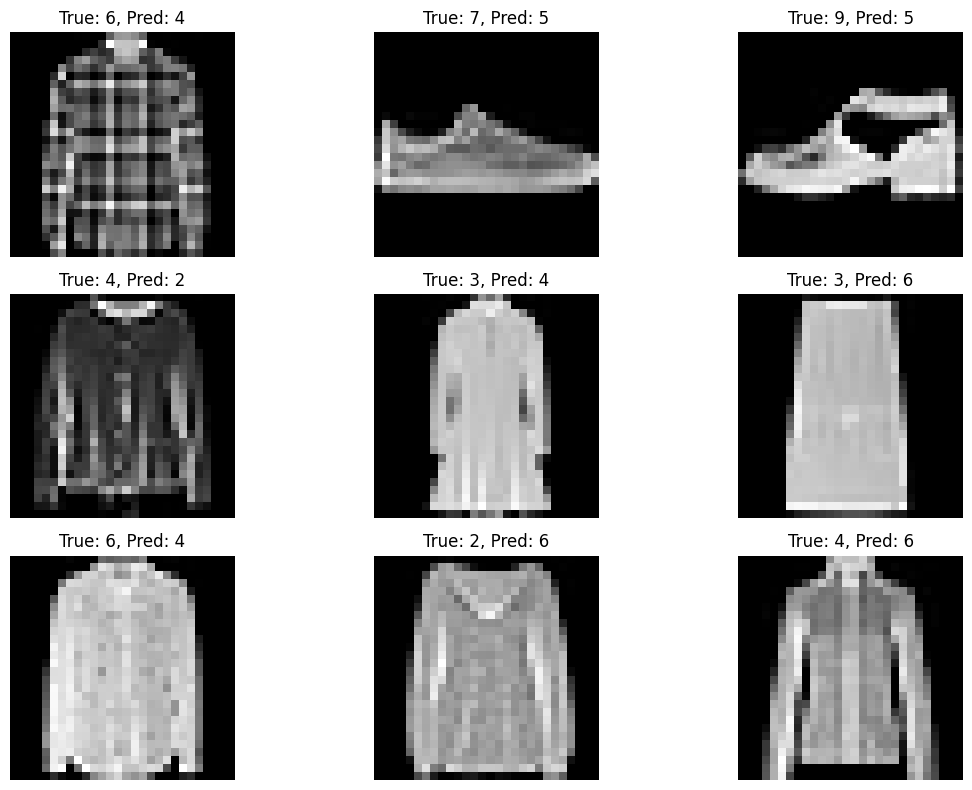

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Display misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Show a few misclassified samples
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


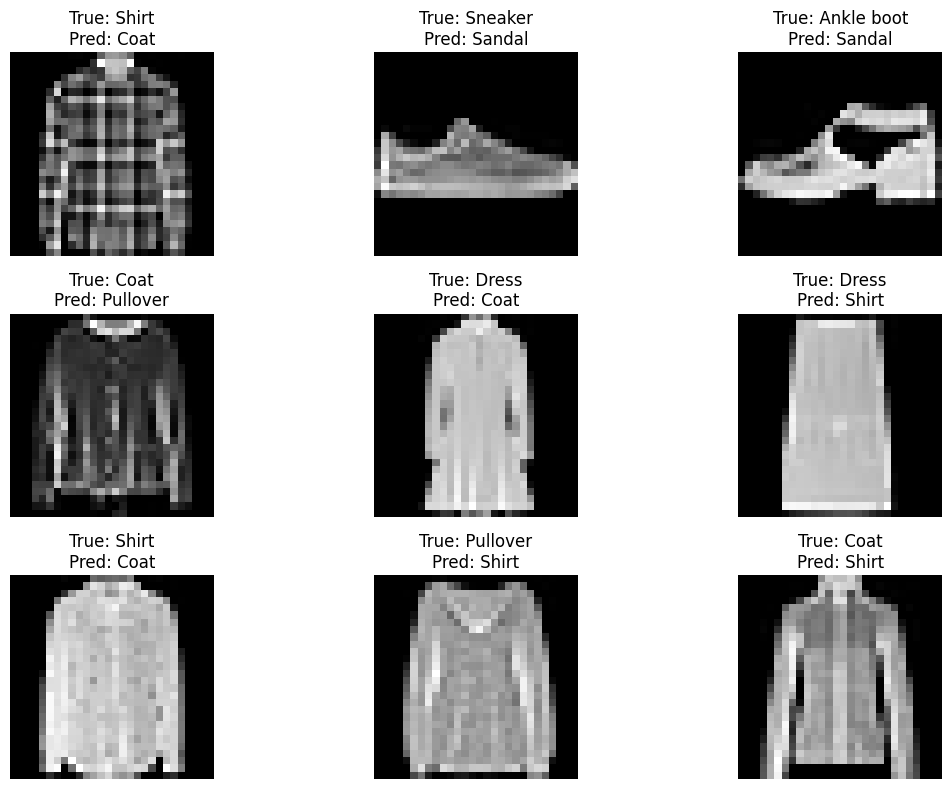

In [8]:
# Define the class names for the Fashion MNIST dataset
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Display misclassified images with actual class names
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  # Show first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    true_label = class_names[y_test[idx]]
    predicted_label = class_names[y_pred_classes[idx]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
